In [1]:
from pyoculus.problems import CylindricalBfield, AnalyticCylindricalBfield
from pyoculus.solvers import PoincarePlot
import matplotlib.pyplot as plt
import numpy as np

#### Equilibrium and creating single null configuration

In [2]:
separatrix = {"type": "circular-current-loop", "amplitude": -4, "R": 3, "Z": -2.2}

ps = AnalyticCylindricalBfield.without_axis(3, 0, 0.91, 0.7, perturbations_args = [separatrix], Rbegin = 1, Rend = 5, niter = 800, guess=[3.,-0.1],  tol = 1e-9)
# ps = AnalyticCylindricalBfield(3, 0, 0.9, 0.7, perturbations_args = [separatrix])

0 - dr : 0.3418061273937418
1 - RZ : [ 3.17781066 -0.1816749 ]
1 - dr : 0.13978868193918587
2 - RZ : [ 3.21518625 -0.3240081 ]
2 - dr : 0.046609275215195096
3 - RZ : [ 3.20017547 -0.41327422]
3 - dr : 0.008202859942765758
4 - RZ : [ 3.1933301  -0.43222207]
4 - dr : 0.00013862367841111498
5 - RZ : [ 3.193206   -0.43254565]
5 - dr : 2.3992613586719e-08
6 - RZ : [ 3.19320599 -0.43254571]
6 - dr : 1.0547118733938987e-15


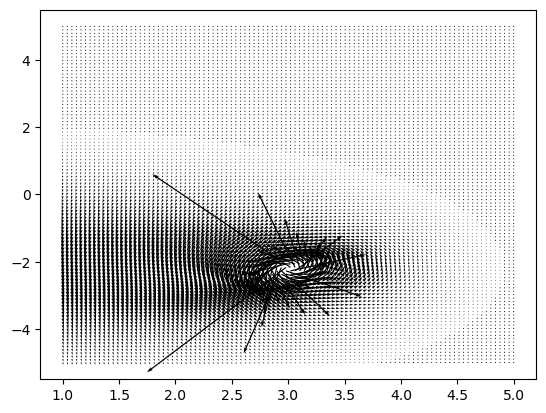

In [3]:
pert = ps.perturbations[0]
Rs, Zs = np.meshgrid(np.linspace(1, 5, 100), np.linspace(-5, 5, 100))
Bs = [pert([R, 0, Z]) for R, Z in zip(Rs.ravel(), Zs.ravel())]

plt.quiver(Rs, Zs, np.array(Bs)[:,0], np.array(Bs)[:,2])

In [4]:
ps.B([3.,0.,0.])
%timeit ps.B([3.,0.,0.])

9.77 µs ± 1.04 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

zs = np.linspace(-10, 10, 100)
# Brs = [ps.B([3.2, 0., z])[0] for z in zs]
Brs = [pert([3., 0., z])[1] for z in zs]
ax.plot(Brs, zs)

# pt = ps.perturbations[0]
# Brps = [pt([3., 0., z])[0] for z in zs]
# ax.plot(Brps, zs, alpha=0.5)

ax.vlines(0, -10, 10, color='k', linestyle='--')
# ax.hlines(0, -2, 2, color='k', linestyle='--')
ax.set_xlim(-2, 2)

In [6]:
# set up the integrator
iparams = dict()
iparams["rtol"] = 1e-7

# set up the Poincare plot
pparams = dict()
pparams["Rbegin"] = 3.01
pparams["Rend"] = 5.5
pparams["nPtrj"] = 20
pparams["nPpts"] = 200
pparams["zeta"] = 0
# pparams["Z"] = -6

# Set RZs
nfieldlines = pparams["nPtrj"]+1
Rs = np.linspace(3.2, 3.15, nfieldlines)
Zs = np.linspace(-0.43, -2.5, nfieldlines)
RZs = np.array([[r, z] for r, z in zip(Rs, Zs)])

pplot = PoincarePlot(ps, pparams, integrator_params=iparams)
pdata = pplot.compute(RZs)
# pdata = pplot.compute()

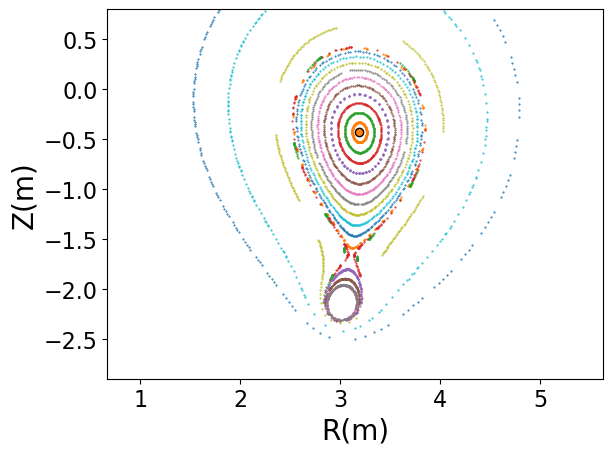

In [7]:
pplot.plot(marker=".", s=1, xlim=[2.3, 4], ylim=[-2.9, 0.8])
plt.scatter(ps._R0, ps._Z0, marker="o", edgecolors="black", linewidths=1)
# plt.scatter(3.11, -1.66, color="r", s=4)
fig = plt.gcf()
ax = fig.get_axes()[0]

In [ ]:
pplot.compute_iota()
pplot.plot_q()

### Finding fixed points

In [8]:
from pyoculus.solvers import FixedPoint

# set up the integrator
iparams = dict()
iparams["rtol"] = 1e-12

pparams = dict()
pparams["nrestart"] = 0
pparams['niter'] = 300

fp = FixedPoint(ps, pparams, integrator_params=iparams)

# fp.compute(guess=[3.5, 0], pp=1, qq=2, sbegin=2, send=4, tol = 1e-12)
fp.compute(guess=[3.10, -1.66], pp=0, qq=1, sbegin=0.1, send=6, tol = 1e-10)

0 - dr : 0.013293184234729543 - dtheta : 0.009803818977396794
1 - RZ : [ 3.10276723 -1.66494332] - rhotheta : [ 1.23571155 -1.64404941]
1 - dr : 7.14533064438086e-05 - dtheta : 5.23455220549085e-05
2 - RZ : [ 3.1027822  -1.66497029] - rhotheta : [ 1.23573736 -1.64403574]
2 - dr : 2.2279799224871874e-09 - dtheta : 1.6293995042104825e-09
3 - RZ : [ 3.10281307 -1.66495848] - rhotheta : [ 1.23572331 -1.64401153]
3 - dr : 1.3442119293055293e-07 - dtheta : 9.86317940654402e-08
4 - RZ : [ 3.10281365 -1.66495832] - rhotheta : [ 1.23572311 -1.64401106]
4 - dr : 5.745489274524008e-11 - dtheta : 3.993960717707523e-11


In [9]:
results = [list(p) for p in zip(fp.x, fp.y, fp.z)]
results

[[3.1028136541777145, 0.0, -1.664958318871019],
 [3.1028136542290845, 0.0, -1.6649583188452861]]

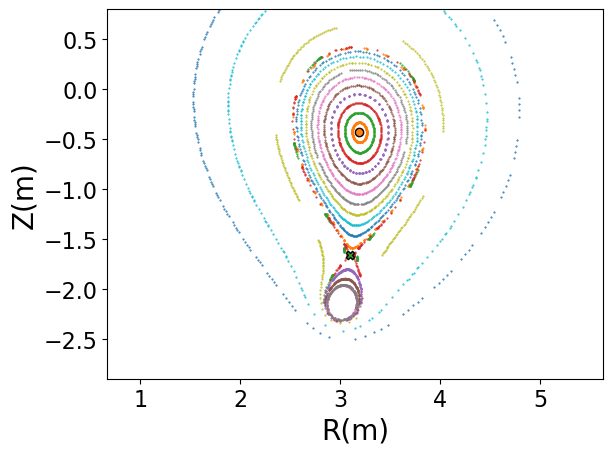

In [10]:
ax.scatter(results[0][0], results[0][2], marker="X", edgecolors="black", linewidths=1)
fig

#### With perturbation

In [11]:
maxwellboltzmann = {"m": 3, "n": -2, "d": 1, "type": "maxwell-boltzmann", "amplitude": 0.01}

In [12]:
ps.add_perturbation(maxwellboltzmann)

In [13]:
ps.amplitudes = [-4, 0.001]
print(ps.amplitudes)

[-4, 0.001]


In [14]:
# set up the integrator
iparams = dict()
iparams["rtol"] = 1e-7

# set up the Poincare plot
pparams = dict()
pparams["Rbegin"] = 3.01
pparams["Rend"] = 5.5
pparams["nPtrj"] = 20
pparams["nPpts"] = 200
pparams["zeta"] = 0
# pparams["Z"] = -6

# Set RZs
nfieldlines = pparams["nPtrj"]+1
n1, n2 = int(np.ceil(nfieldlines/2)), int(np.floor(nfieldlines/2))
Rs = np.concatenate((np.linspace(ps._R0+1e-4, results[0][0], n1), np.linspace(results[0][0], separatrix['R']-1e-4, n2)))
Zs = np.concatenate((np.linspace(ps._Z0+1e-4, results[0][2], n1), np.linspace(results[0][2], separatrix['Z']-1e-4, n2)))
RZs = np.array([[r, z] for r, z in zip(Rs, Zs)])

In [15]:
pplot_perturbed = PoincarePlot(ps, pparams, integrator_params=iparams)
pdata = pplot_perturbed.compute(RZs)
# pdata = pplot.compute()

C:\Users\Ludovic\kDrive\etudes\EPFL\masterthesis\pyoculus\pyoculus\problems\cylindrical_bfield.py:66: RuntimeWarning: divide by zero encountered in scalar divide
  dRdt = Bfield[0] / Bfield[1]
C:\Users\Ludovic\kDrive\etudes\EPFL\masterthesis\pyoculus\pyoculus\problems\cylindrical_bfield.py:67: RuntimeWarning: divide by zero encountered in scalar divide
  dZdt = Bfield[2] / Bfield[1]


Integration failed for s= 2.9999


c:\Users\Ludovic\miniforge3\envs\simsopt\lib\site-packages\scipy\integrate\_ode.py:431: UserWarning: dopri5: larger nsteps is needed
  self._y, self.t = mth(self.f, self.jac or (lambda: None),


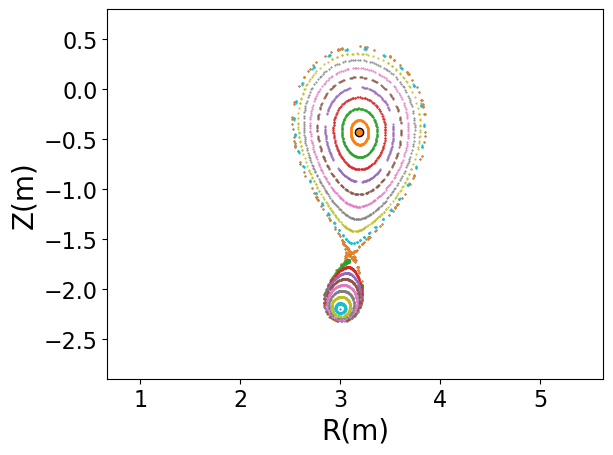

In [16]:
pplot_perturbed.plot(marker=".", s=1, xlim=[2.3, 4], ylim=[-2.9, 0.8])
plt.scatter(ps._R0, ps._Z0, marker="o", edgecolors="black", linewidths=1)
# plt.scatter(3.11, -1.66, color="r", s=4)
fig_perturbed = plt.gcf()
ax_perturbed = fig_perturbed.get_axes()[0]

In [18]:
# set up the integrator
iparams = dict()
iparams["rtol"] = 1e-12

pparams = dict()
pparams["nrestart"] = 0
pparams['niter'] = 300

fp_perturbed = FixedPoint(ps, pparams, integrator_params=iparams)

# fp_perturbed.compute(guess=[fp.x[0], fp.z[0]], pp=0, qq=1, sbegin=0.1, send=6, tol = 1e-10)
fp_perturbed.compute(guess=[3.11, -1.6], pp=0, qq=1, sbegin=0.1, send=6, tol = 1e-10)

0 - dr : 1.9916722582546187 - dtheta : 3.4639221094389763
1 - RZ : [ 2.42042241 -0.00814217] - rhotheta : [0.88165346 2.639373  ]
1 - dr : 1.7386705907305438 - dtheta : 2.693748711647017
2 - RZ : [ 2.5249385  -2.02405281] - rhotheta : [ 1.72611596 -1.96833592]
2 - dr : 3.2612443931016246 - dtheta : 3.8808568728033594
3 - RZ : [ 2.37738671 -0.36717406] - rhotheta : [0.8184342  3.06163343]
3 - dr : 1.6042594997445325 - dtheta : 2.848202497589042
4 - RZ : [ 3.03729557 -1.99947305] - rhotheta : [ 1.57466483 -1.66997063]
4 - dr : 0.006474538786504565 - dtheta : 0.004110865920642581
5 - RZ : [ 3.03410917 -1.99898959] - rhotheta : [ 1.57450253 -1.67201484]
5 - dr : 0.002513905211902133 - dtheta : 0.0015966142089722801
6 - RZ : [ 3.03535244 -1.99914081] - rhotheta : [ 1.57452785 -1.67121956]
6 - dr : 0.0003789051367875807 - dtheta : 0.00024064493008291166
7 - RZ : [ 3.03553953 -1.99916575] - rhotheta : [ 1.57453392 -1.67109975]
7 - dr : 8.609425128560293e-06 - dtheta : 5.467874850673127e-06
8 

In [20]:
fp_perturbed.x, fp_perturbed.y, fp_perturbed.z

(array([3.03689244, 3.03689244]),
 array([0., 0.]),
 array([-1.99930494, -1.99930494]))

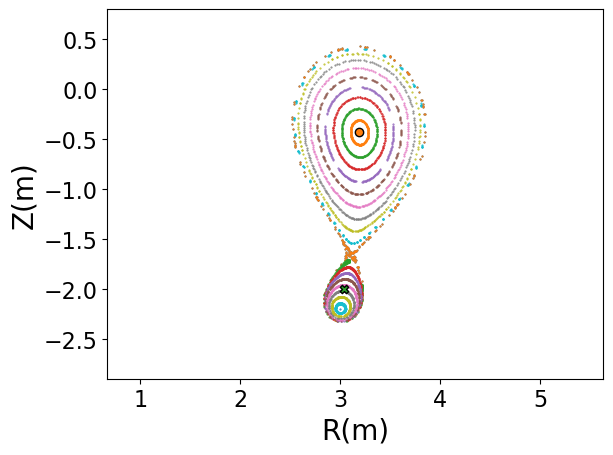

In [19]:
ax_perturbed.scatter(fp_perturbed.x[0], fp_perturbed.z[0], marker="X", edgecolors="black", linewidths=1)
fig_perturbed

In [21]:
ps.B([fp_perturbed.x[0], 0, fp_perturbed.z[0]])

array([-1.71222475,  1.79876912,  0.18694765])

In [23]:
ps.dBdX([fp_perturbed.x[0], 0., fp_perturbed.z[0]])

array([[ 5.45724067e+00, -9.78500458e-01,  1.49302512e+01],
       [ 2.32357224e-03, -5.63808165e-01,  5.96694721e-04],
       [ 1.36213287e+01, -2.10214755e-01, -4.89343251e+00]])

In [24]:
np.trace(ps.dBdX([fp_perturbed.x[0], 0., fp_perturbed.z[0]]))

4.529709940470639e-14

#### Back on manifold